In [1]:
#bibliotecas base
import pandas as pd
import numpy as np

#biblioteca para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#bibliotecas para estatística
import scipy.stats as stat

In [2]:
!pip install pydataset --quiet ##instalando a biblioteca pydataset
from pydataset import data #biblioteca que contém diferentes datasets

In [3]:
data('Forbes2000', show_doc = True)

Forbes2000

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  The Forbes 2000 Ranking of the World's Biggest Companies (Year 2004)

### Description

The Forbes 2000 list is a ranking of the world's biggest companies, measured
by sales, profits, assets and market value.

### Usage

    data("Forbes2000")

### Format

A data frame with 2000 observations on the following 8 variables.

rank

the ranking of the company.

name

the name of the company.

country

a factor giving the country the company is situated in.

category

a factor describing the products the company produces.

sales

the amount of sales of the company in billion USD.

profits

the profit of the company in billion USD.

assets

the assets of the company in billion USD.

marketvalue

the market value of the company in billion USD.

### Source

http://www.forbes.com, assessed on November 26th, 2004.

### Examples

    data("Forbes2000", package = "HSAUR")
    summary(Forbes2000)


In [4]:
forbes = data('Forbes2000')
forbes.head()

,rank,name,country,category,sales,profits,assets,marketvalue
1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


In [5]:
forbes.info() #Verifica quais colunas são numéricas e quais são categóricas

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         2000 non-null   int64  
 1   name         2000 non-null   object 
 2   country      2000 non-null   object 
 3   category     2000 non-null   object 
 4   sales        2000 non-null   float64
 5   profits      1995 non-null   float64
 6   assets       2000 non-null   float64
 7   marketvalue  2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 140.6+ KB


colunas denotadas por 'object' são categorias, as colunas int64 são inteiros e float64 são numéricas contínuas

Análise de tendência central

Moda: aplicada em todas as variáveis do dataframe
- Utiliza a função df.mode()
    - Nesse caso vai ser retirado as 2 primeiras colunas, já que elas assumem valores únicos o que as torna colunas identificadoras

In [6]:
forbes.iloc[:, 2:8].mode()

,country,category,sales,profits,assets,marketvalue
0,United States,Banking,0.58,0.13,4.22,1.34


Média e mediana: aplicada somente para as variáveis numéricas


In [7]:
forbes[['sales', 'profits', 'assets', 'marketvalue']].mean()

sales           9.697010
profits         0.381133
assets         34.041850
marketvalue    11.877655
dtype: float64

In [8]:
forbes[['sales', 'profits', 'assets', 'marketvalue']].median()

sales          4.365
profits        0.200
assets         9.345
marketvalue    5.150
dtype: float64

A função describe calcula estatísticas descritivas das variáveis numéricas

In [9]:
forbes.describe()

,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,256.330000,20.960000,1264.030000,328.540000


Nesse caso, a média e a mediana são representadas pelo percentil 50%

---------

Análise de dispersão e outliers

Para a análise de dispersão, iremos calcular:


- Amplitude, desvio padrão e variancia

In [10]:
'''Essa função adiciona no describe anterior as colunas de amplitude e variância
    A amplitude será o máximo - mínimo valor
    A variância será o desvio padrão ao quadrado'''

def describe_new (df):
    df1 = df.describe()
    df1.loc['amplitude'] = df1.loc['max'] - df1.loc['min']
    df1.loc['variancia'] = df1.loc['std'] * df1.loc['std']

    return df1

In [11]:
describe_new(forbes)

,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,256.330000,20.960000,1264.030000,328.540000
amplitude,1999.000000,256.320000,46.790000,1263.760000,328.520000
variancia,333500.000000,324.093331,3.116828,9935.860339,598.301217


A maior amplitude ou discrepância das empresas listadas na forbes 2000 é relacionada aos ativos da empresa, os assets, conforme pode ser visualizado. Essa também é a variável com maior desvio padrão (não será considerado a variável ranking, tendo em vista que neste caso ela iria ser similar ao ID da empresa)

- Histogramas das variáveis


<Figure size 800x1800 with 0 Axes>

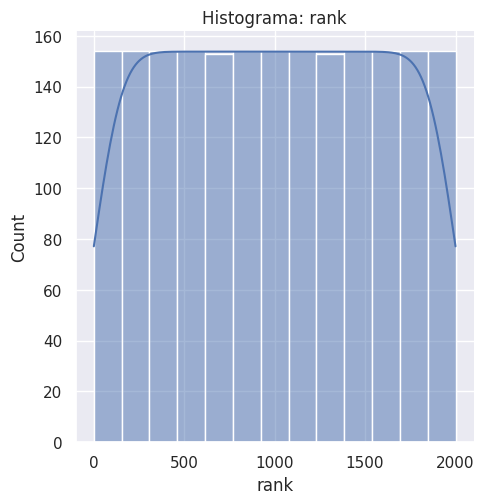

<Figure size 800x1800 with 0 Axes>

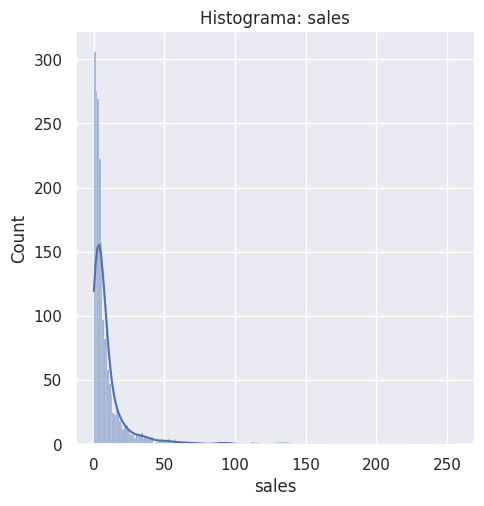

<Figure size 800x1800 with 0 Axes>

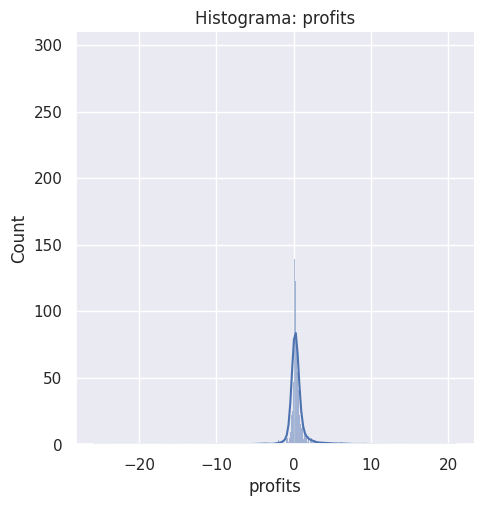

<Figure size 800x1800 with 0 Axes>

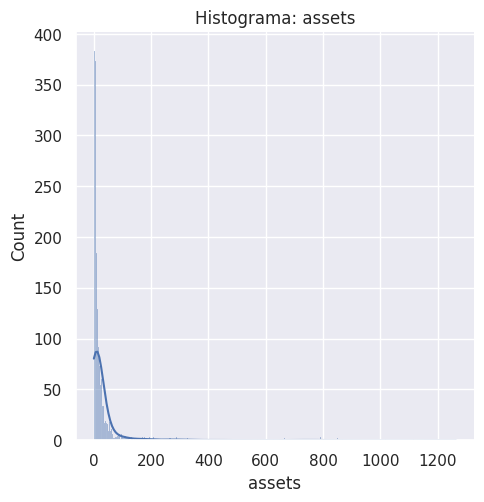

<Figure size 800x1800 with 0 Axes>

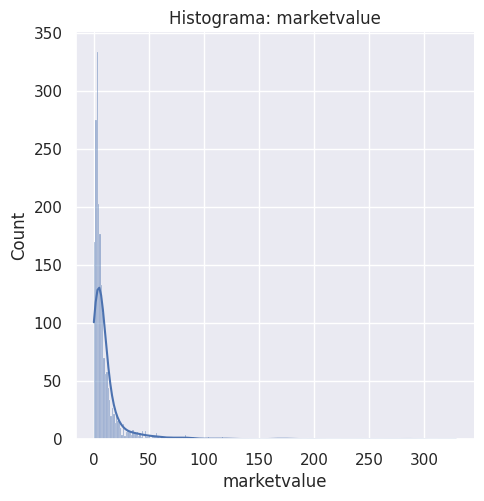

In [12]:
plt.rcParams['figure.figsize'] = [8, 18]
sns.set_theme()

#criação de distplots
for column in forbes.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data = forbes, x = column, kde = True)
    plt.title('Histograma: ' + column)

- Construção de boxplot
- Verificação de outliers

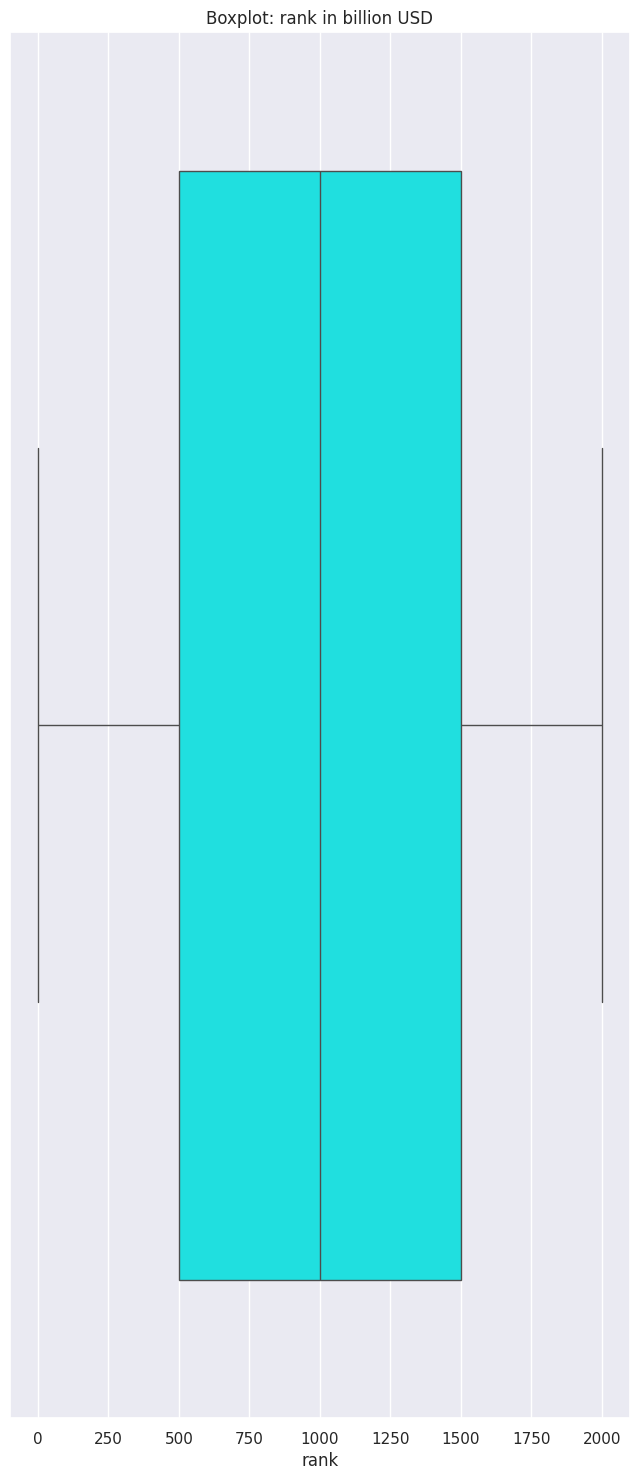

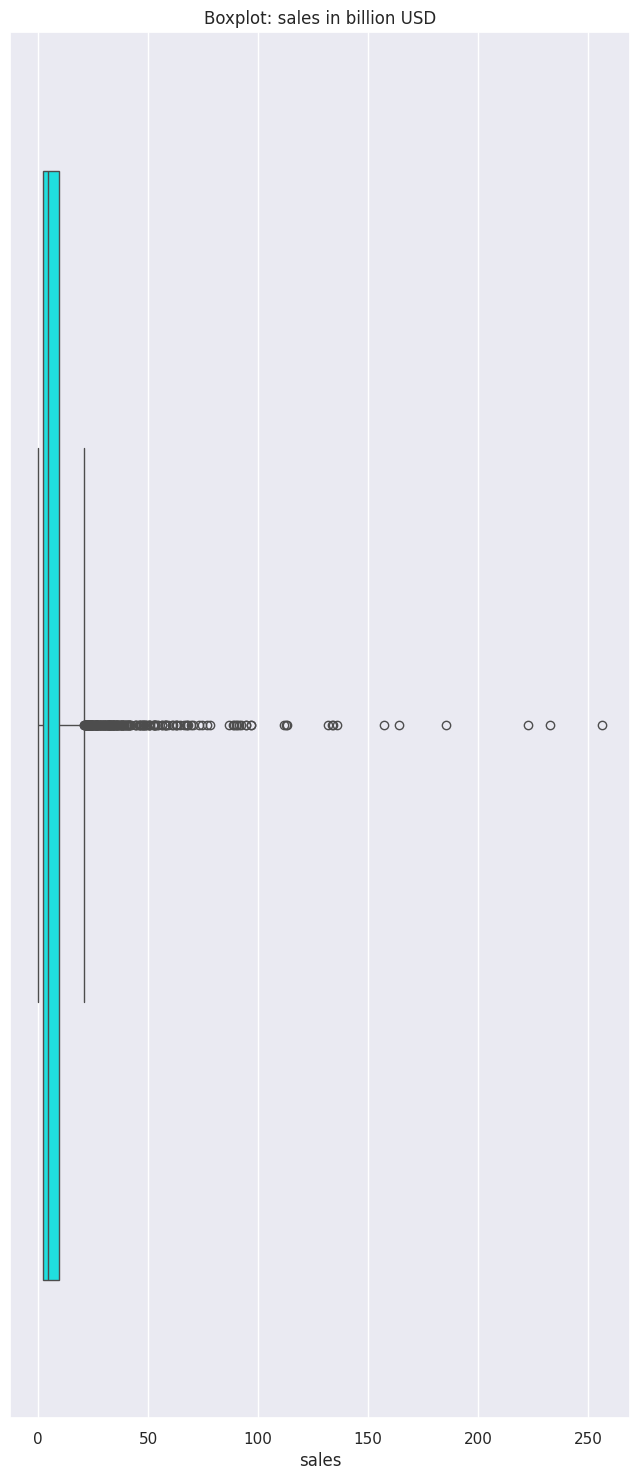

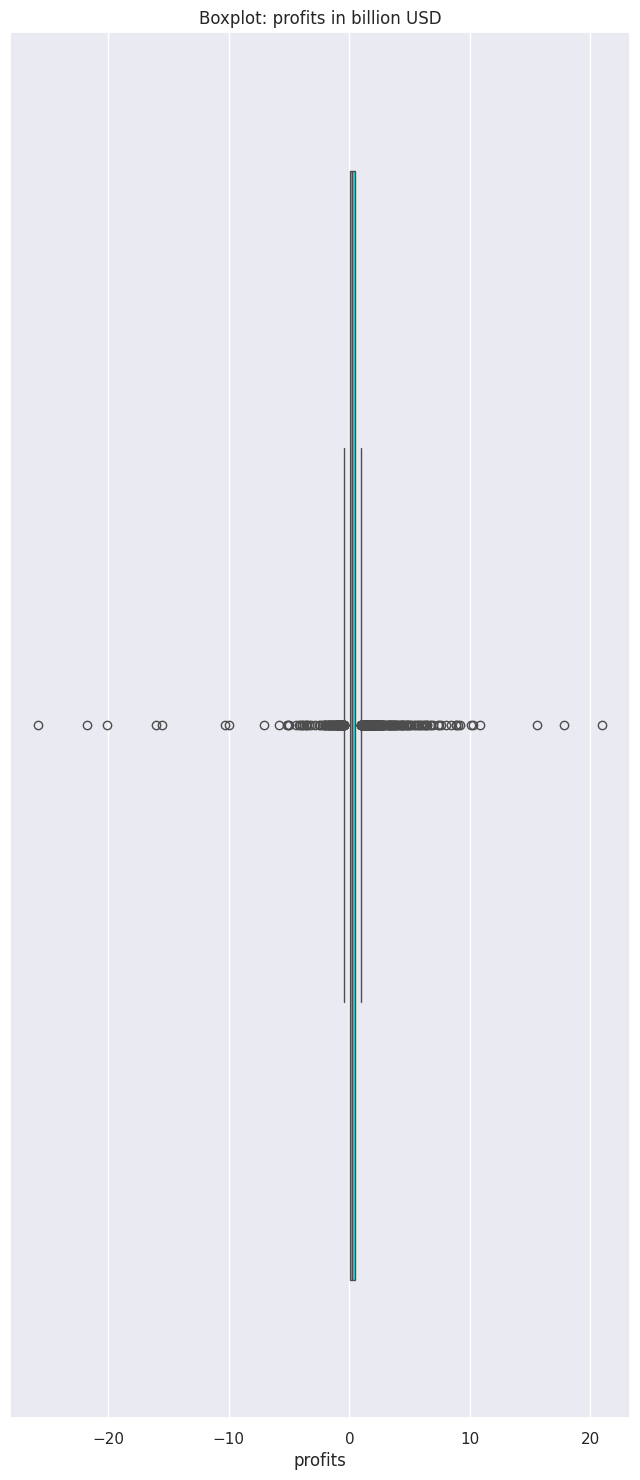

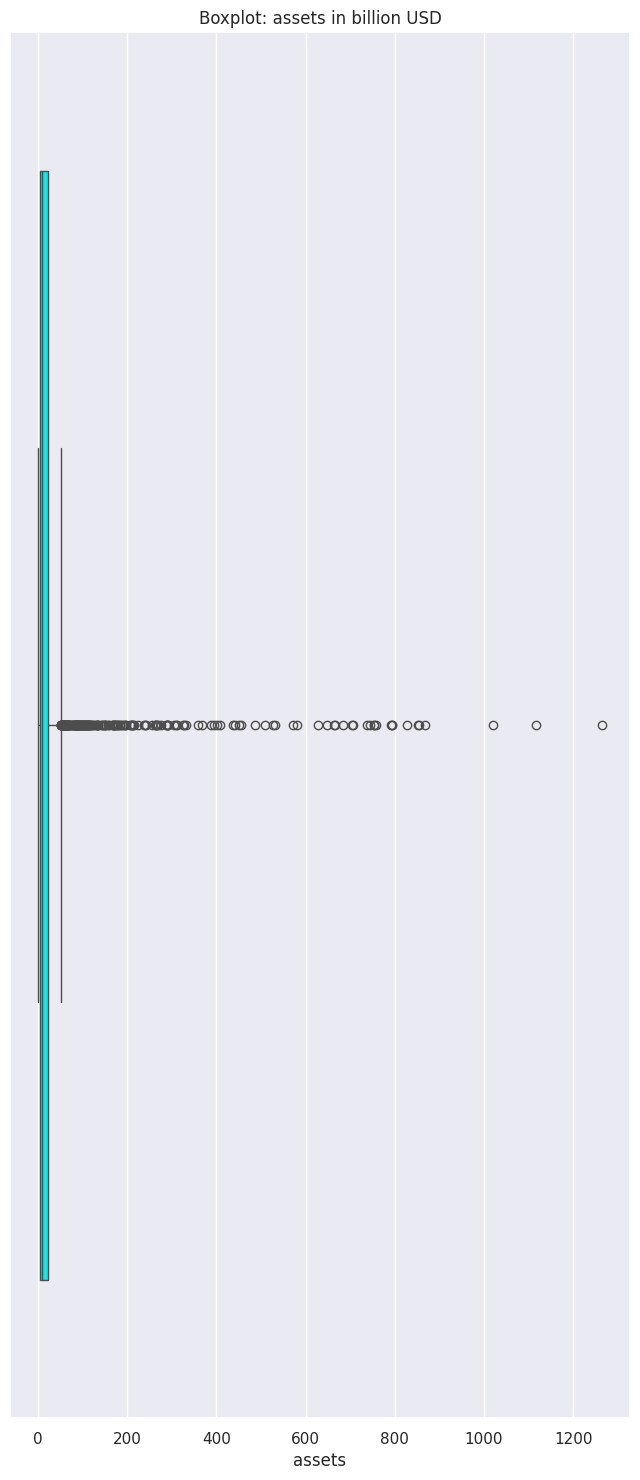

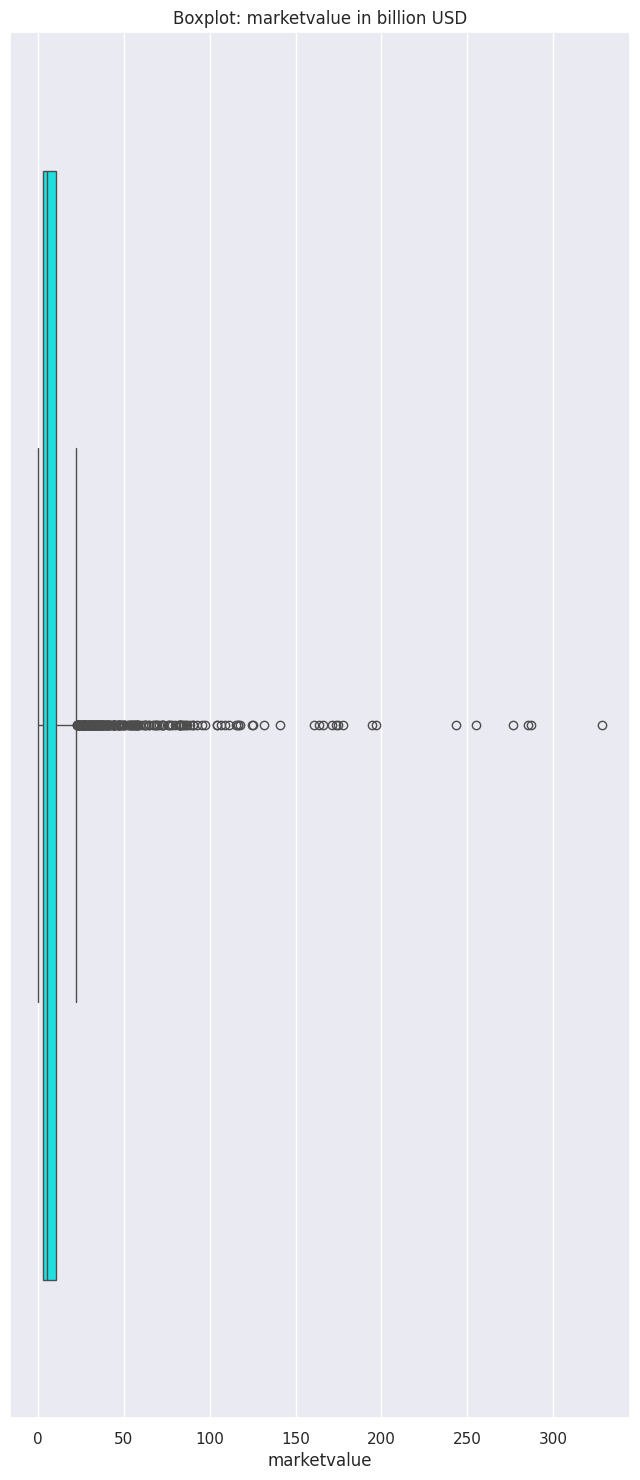

In [13]:
plt.rcParams['figure.figsize'] = [8, 18]
sns.set_theme()

#para cada uma das colunas numéricas o boxplot é rodado
for column in forbes.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data = forbes , x = column, color = 'cyan', showfliers = True)
    plt.title('Boxplot: ' + column + ' in billion USD')

Nota-se a grande quantidade de outliers expressadas pelos pontinhos nos gráficos de caixa, o que dificultou bastante a visualização dos dados

Para criar boxplot sem considerar os outliers, pode ser rodado a mesma função, porém, com o parametro showfliers = False, assim ficará mais fácil a análise dos resultados

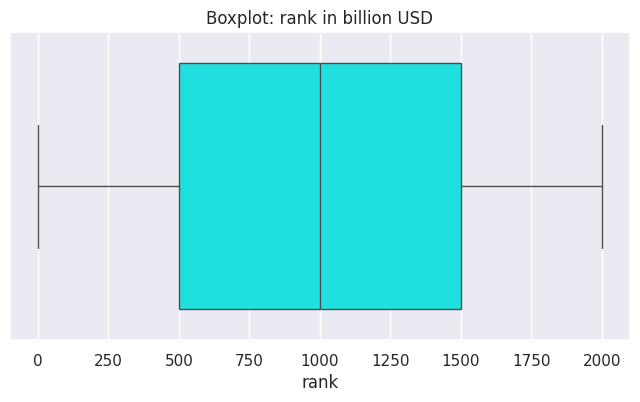

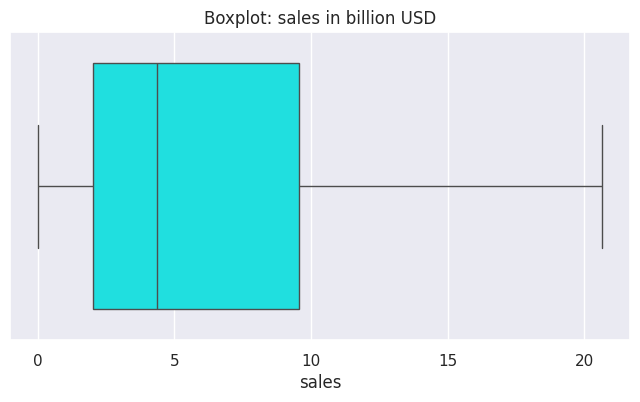

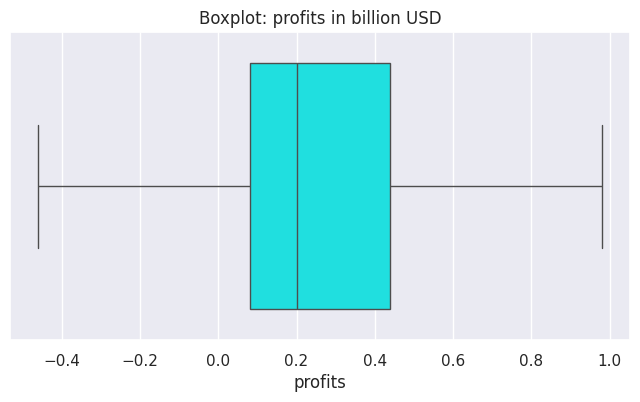

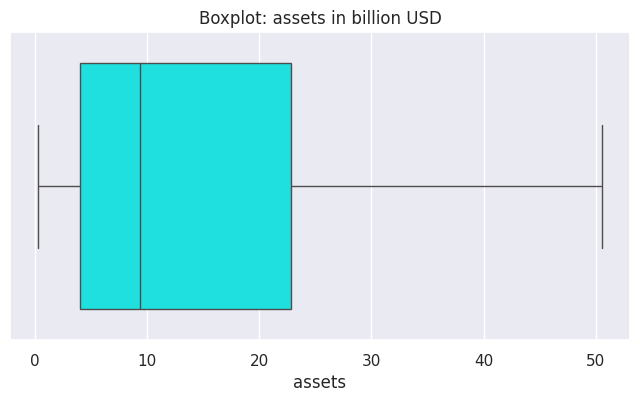

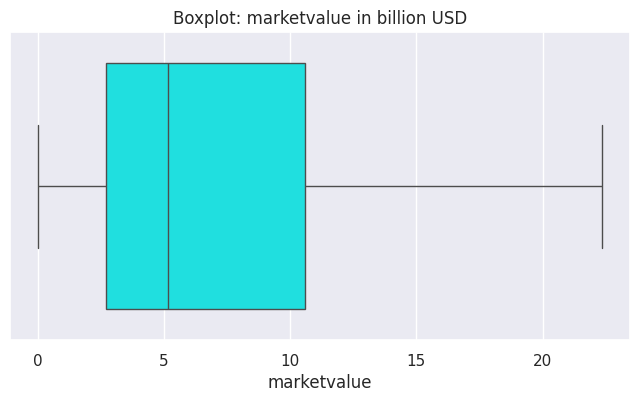

In [14]:
plt.rcParams['figure.figsize'] = [8,4]
sns.set_theme()

#filtrando o plot somente por variáveis numéricas
for column in forbes.select_dtypes(include=np.number). columns:
    plt.figure()
    sns.boxplot(data = forbes, x= column, color = 'cyan', showfliers = False)
    plt.title('Boxplot: ' + column + ' in billion USD')

- Verificação de outliers

Pelos boxplots, pode ser visualizado a grande concentração de empresas com:
- Vendas próximas a 2-9 bilhões
- Lucro oscilando próximo a 0 (0.1 a 0.5 bilhões) com valores positivos e negativos nas caldas,
- Assets (ativos) de 5 a 25 bilhões
- Valor de mercado próximo a 3 - 11 bilhoões

-----

Outliers das variáveis

1. Método do Z score:

O método do z-score utiliza como referência quantos desvios padrãos a informação está da média

Se z-score > 3 desvios padrões, geralmente se pode considerar como um outlier

In [15]:
import pandas as pd
import numpy as np
from scipy import stats #pacote de estatística que contém a função z-score

In [16]:
#função que calcula a quantidade de outliers encontrados dado o nome do dataframe, o threshold e o nome da coluna
def find_outlier_zscore(dataset, threshold, colname):
    df = dataset[colname]
    outliers = []
    zscore = []
    threshold = threshold
    mean = np.mean(df)
    std = np.mean(df)
    
    for i in df.values:
        z_score = (i - mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    
    print ('O número de outliers encontrado em {} foi de: '.format(colname), len(outliers))
    return zscore, outliers

O número de outliers encontrado em rank foi de:  0
O número de outliers encontrado em sales foi de:  89


O número de outliers encontrado em profits foi de:  230
O número de outliers encontrado em assets foi de:  93
O número de outliers encontrado em marketvalue foi de:  91


<Figure size 1000x500 with 0 Axes>

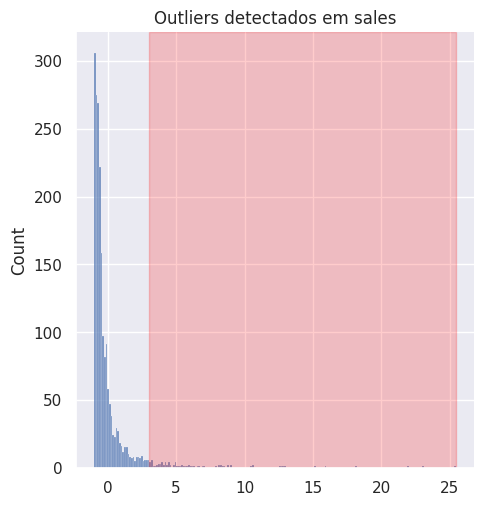

<Figure size 1000x500 with 0 Axes>

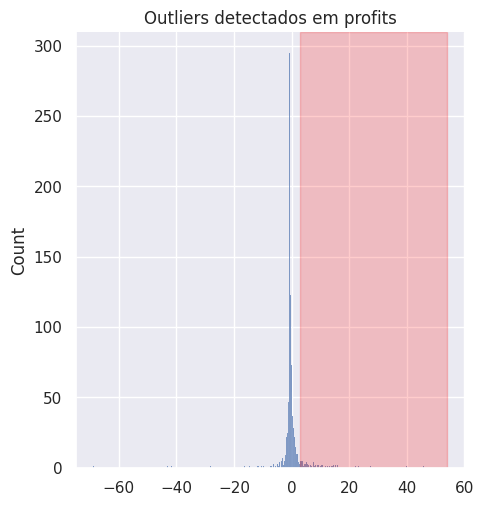

<Figure size 1000x500 with 0 Axes>

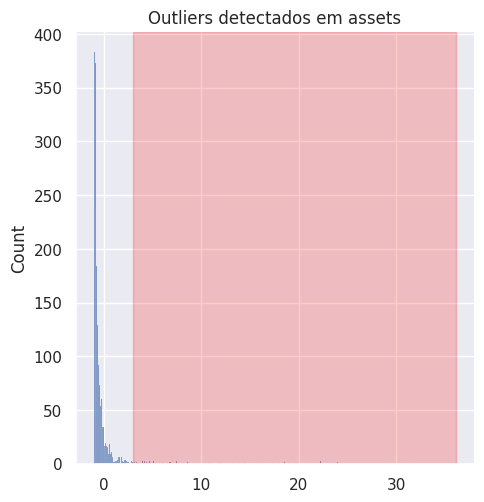

<Figure size 1000x500 with 0 Axes>

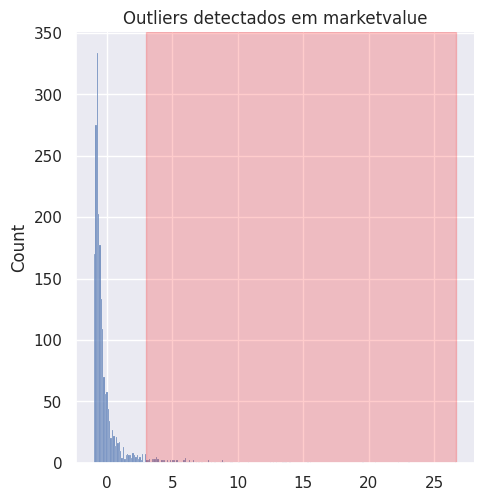

In [17]:
for column in forbes.select_dtypes(include=np.number).columns:
    zscore, out = find_outlier_zscore(forbes, 3, column)
    if len(out) > 0:
        plt.figure(figsize=(10,5))
        sns.displot(zscore)
        plt.axvspan(xmin = 3, xmax = max(zscore), alpha=0.2, color = 'red')
        plt.title('Outliers detectados em {}'.format(column))

Pelos gráficos acima, fica mais fácil visualizar os valores de outliers para cada nível de z-score

Para z-score = 3, valores considerados outliers estão nas caldas dos histogramas, em vermelho

----

Removendo outliers com o método z-score

- Replace outliers with mean

In [18]:
#função que faz um replace NAN caso seja encontrado um outlier
def replace_na_outlier_zscore (dataset, threshold, colname):
    df = dataset[colname]
    outliers = []
    zscore = []
    val = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)

    for i in df.values:
        z_score = (i - mean )/std
        zscore.append(z_score)

        if np.abs(z_score) > threshold:
            outliers.append(i)
            val.append(np.nan)
        else:
            val.append(i)
        
    return val

In [19]:
#utiliza a função drop NA para remover outliers
def drop_outliers(dataset, threshold):
    for column in dataset.select_dtypes(include = np.number).columns:
        dataset[column] = replace_na_outlier_zscore(dataset, 3, column)
    return dataset.dropna()

In [20]:
#utiliza a função fillna para trocar os NaNs pela mediana
def replace_median_outliers(dataset, threshold):
    for column in dataset.select_dtypes(include = np.number).columns:
        dataset[column] = replace_na_outlier_zscore(dataset, 3, column)
        
    return dataset.fillna(dataset.median(numeric_only=True))

In [21]:
forbes_zscore_na = drop_outliers(forbes, 3)

In [22]:
forbes_zscore_median = replace_median_outliers(forbes, 3)

In [23]:
forbes_zscore_median

,rank,name,country,category,sales,profits,assets,marketvalue
1,1,Citigroup,United States,Banking,4.13,0.19,8.63,4.82
2,2,General Electric,United States,Conglomerates,4.13,0.19,8.63,4.82
3,3,American Intl Group,United States,Insurance,4.13,0.19,8.63,4.82
4,4,ExxonMobil,United States,Oil & gas operations,4.13,0.19,8.63,4.82
5,5,BP,United Kingdom,Oil & gas operations,4.13,0.19,8.63,4.82
...,...,...,...,...,...,...,...,...
1996,1996,Siam City Bank,Thailand,Banking,0.48,0.02,11.27,1.47
1997,1997,Yokogawa Electric,Japan,Business services & supplies,2.78,-0.22,2.96,3.29
1998,1998,Hindalco Industries,India,Materials,1.35,0.14,2.47,2.76
1999,1999,Nexans,France,Capital goods,5.09,0.00,2.71,0.88


Método do IQR:

O método do IQR (Distância inter-quartil) vê a distância da amplitude dos quartis:

In [24]:
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)

    #calcula IQR
    iqr = q75 - q25

    #calcula outlier cutoff
    cut_off = iqr * 1.5

    #calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print (' IQR é: ', iqr)
    #print ('Valor mínimo: ', lower)
    #print ('Valor máximo: ', upper)
    outliers = []

    for i in dataset[colname].values:
        if((i > upper) or (i < lower)):
            outliers.append(i),

    print ('O número de outliers encontrado foi de: ', len(outliers))
    return lower, upper, outliers

In [25]:
for column in forbes.select_dtypes(include = np.number).columns:
    lower, upper, out = find_outlier_iqr(forbes, column)
    if (len(out) > 0):
        plt.figure(figsize = (10,6))
        sns.displot(forbes[column], kde = False)
        plt.axvspan(xmin = lower, xmax = forbes[column].min(), alpha = 0.2, color = 'red')
        plt.axvspan(xmin = upper, xmax = forbes[column].max(), alpha = 0.2, color = 'red')
        plt.title ("Outliers detectados em {}".format(column))

 IQR é:  999.5
O número de outliers encontrado foi de:  0
 IQR é:  nan
O número de outliers encontrado foi de:  0
 IQR é:  nan
O número de outliers encontrado foi de:  0
 IQR é:  nan
O número de outliers encontrado foi de:  0
 IQR é:  nan
O número de outliers encontrado foi de:  0


----

Análise de Missing Values (dados faltantes)

1. Verificar a soma de dados faltantes para dada uma das colunas do dataframe

In [26]:
forbes.isna().sum()

rank             0
name             0
country          0
category         0
sales           91
profits        101
assets          91
marketvalue     94
dtype: int64

In [27]:
!pip install missingno

In [28]:
import missingno as msno #pacote com visualizações de dados faltantes

<Axes: >

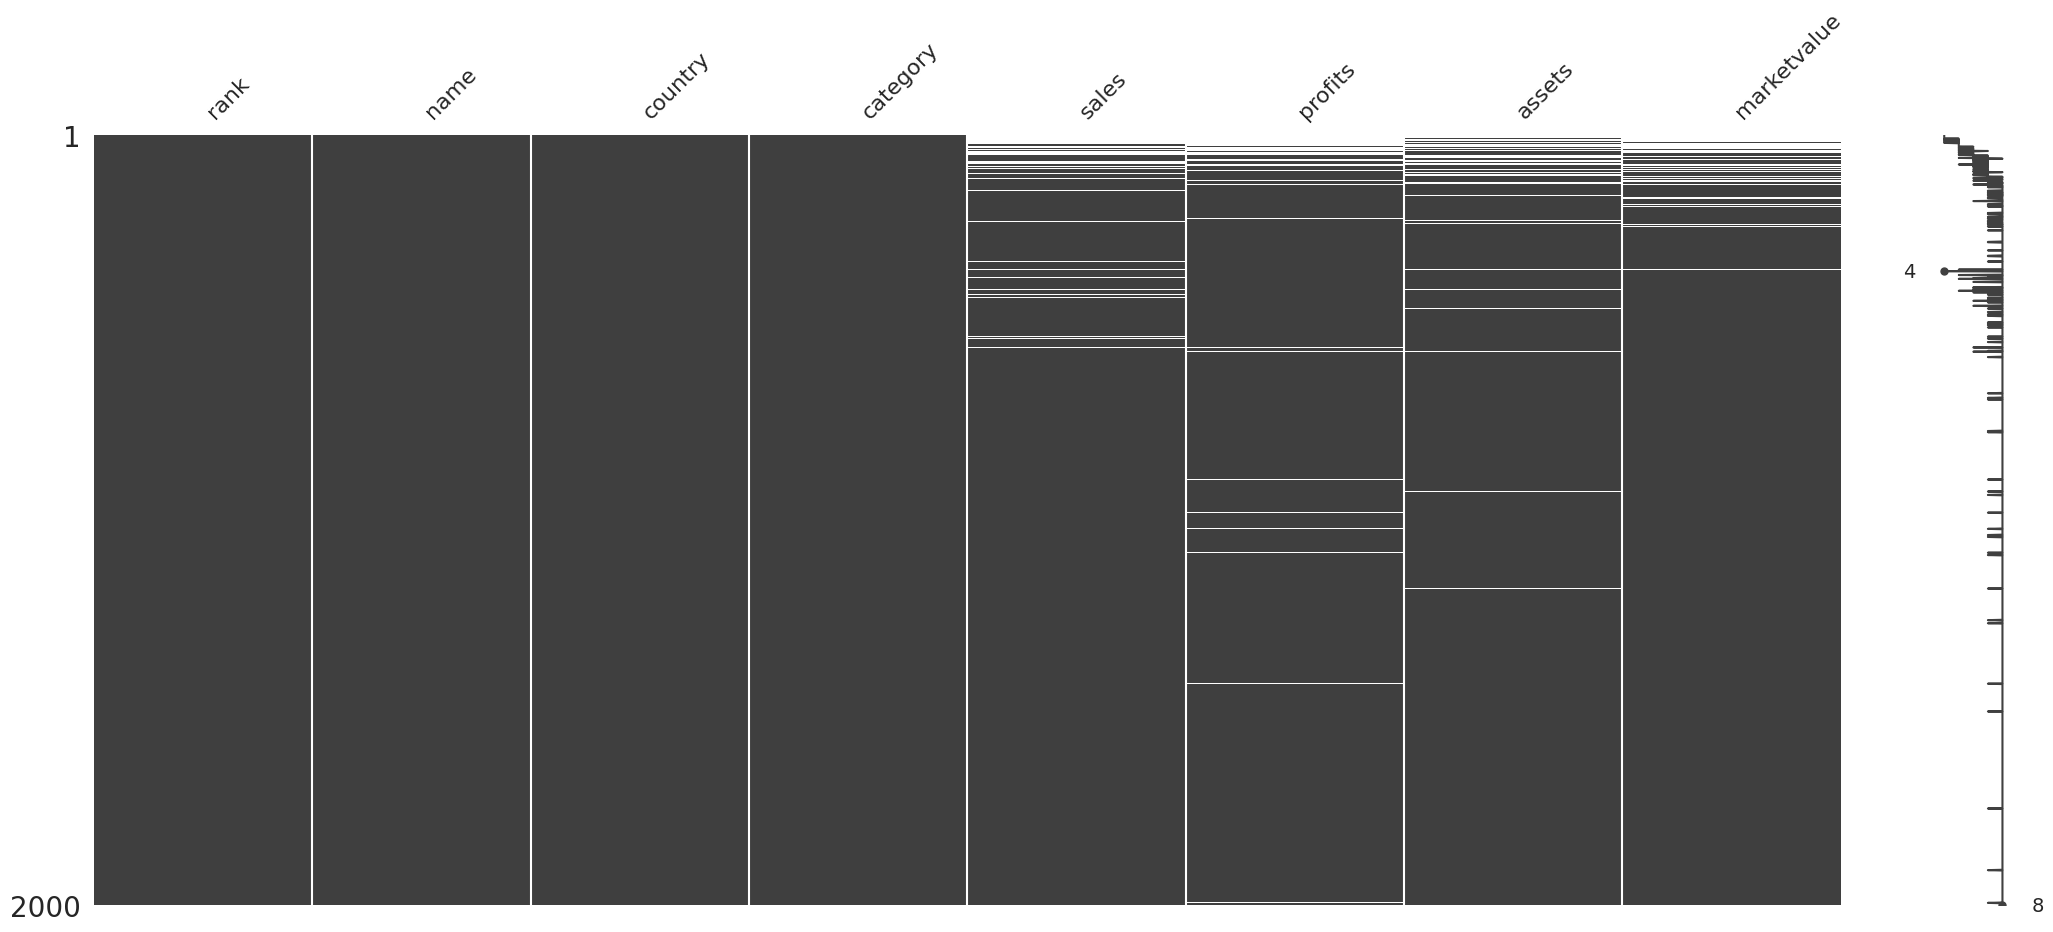

In [29]:
msno.matrix(forbes) #essa visualização nos dá uma ideia de completude dos dados faltantes

isna() é o mesmo que isnull() no pandas

In [30]:
#construção de uma tabela em que o % de valores faltantes de cada variável é exibido

missing = forbes.isna().sum()

missing_perc = 100 * forbes.isna().sum() / len(forbes)

mis_val_table = pd.concat([missing, missing_perc], axis = 1)

mis_val_table = mis_val_table.rename(columns = {0: '# Count: valores nulos', 1: '% do Total'})

mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values(
    '% do Total', ascending = False).round(1)

print ("O dataframe contém " + str(forbes.shape[1]) + " colunas.\n"
       "Contendo " + str(mis_val_table.shape[0]) + 
       " colunas com valores faltantes.")

mis_val_table

O dataframe contém 8 colunas.
Contendo 4 colunas com valores faltantes.


,# Count: valores nulos,% do Total
profits,101,5.0
marketvalue,94,4.7
sales,91,4.6
assets,91,4.6


----

EDA AUTOMATIZADA

Existem 2 pacotes famosos no mundo da análise de dados que fazem analises exploratórias automatizadas:

1. Pandas profiling -> chamado atualmente de ydataprofiling
2. Sweetviz

Ambas geram relatórios html pontos para análises / interpretações do analista

In [31]:
!pip install sweetviz --quiet

In [ ]:
import sweetviz as sv

my_report = sv.analyze(forbes) #lê os dados e cria uma report 

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



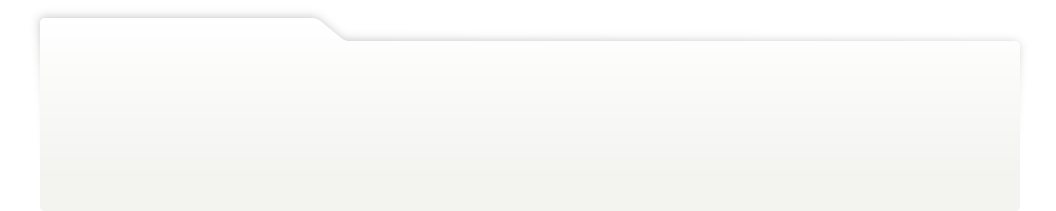
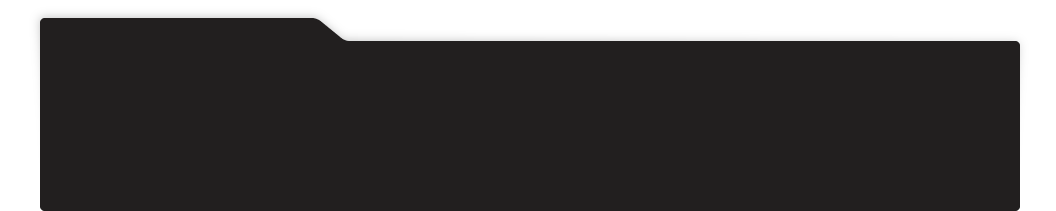
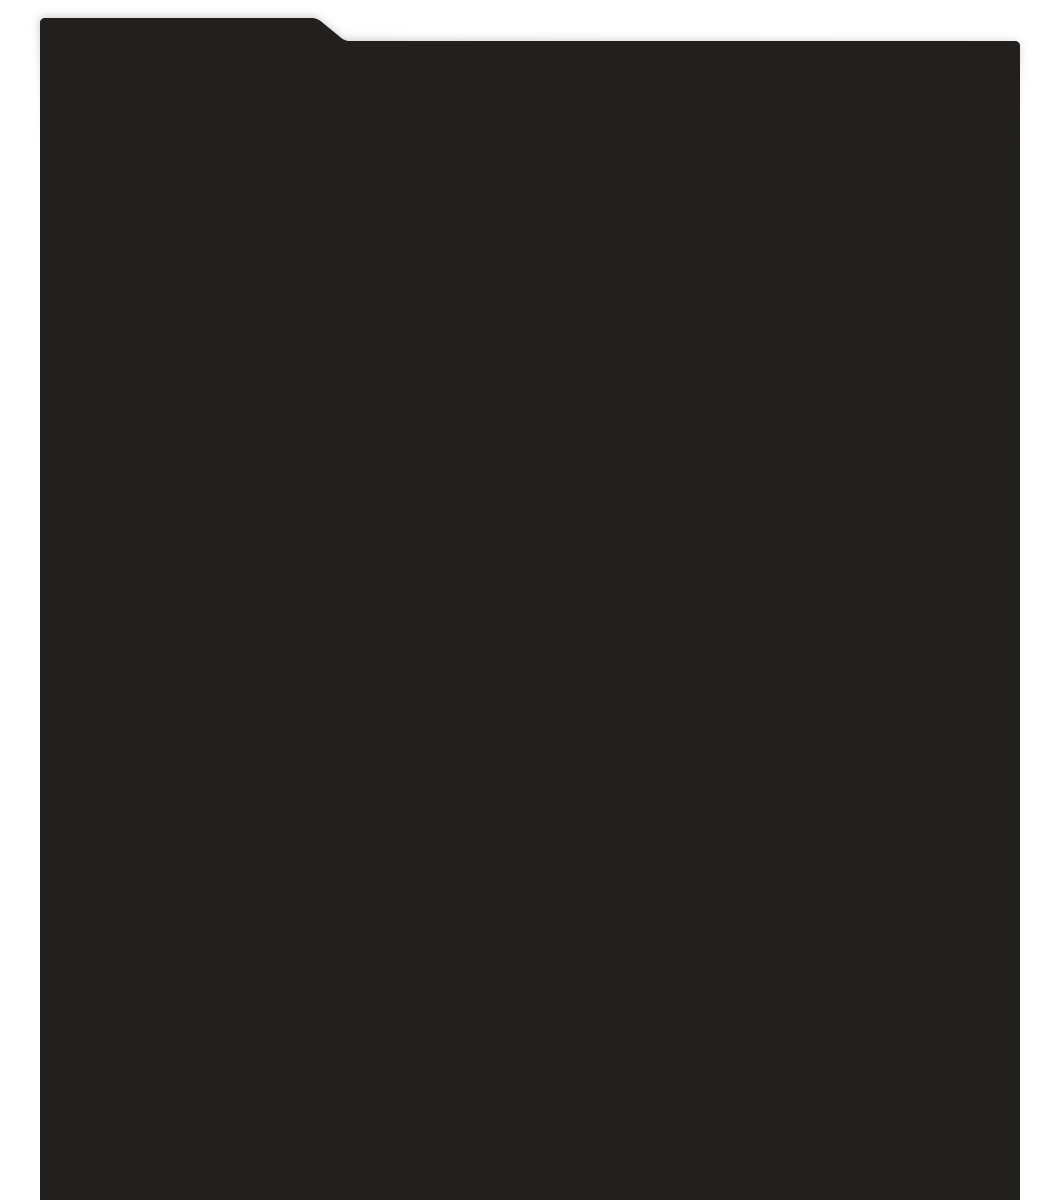
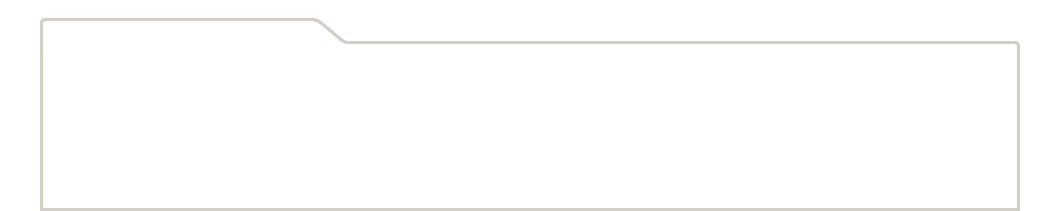
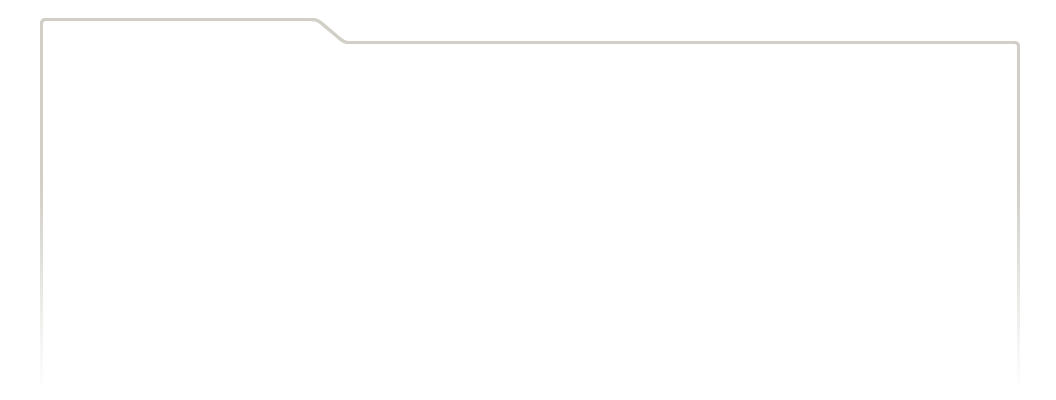
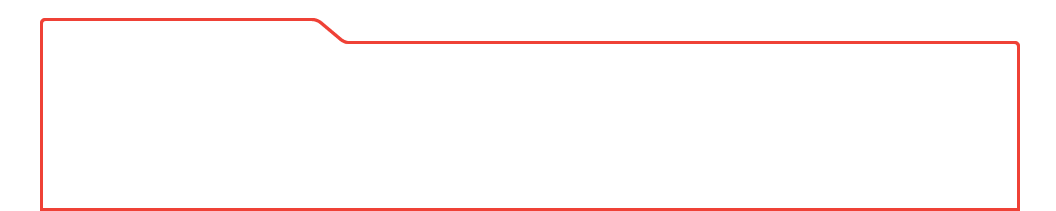
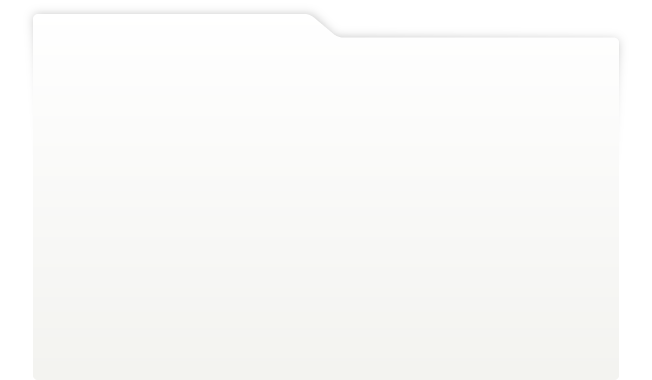
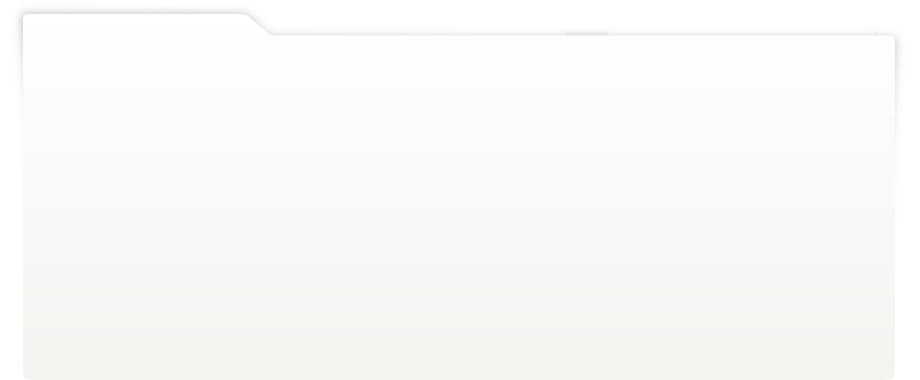
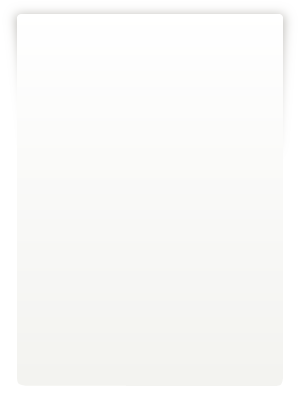
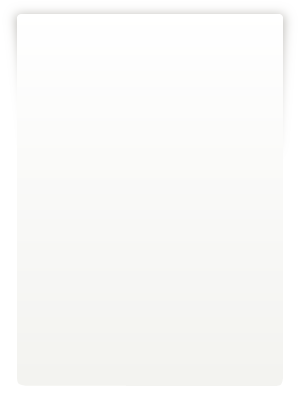
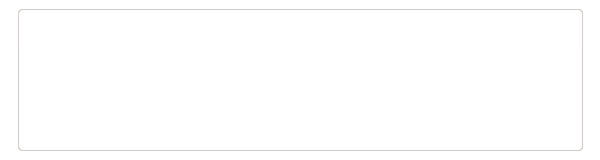
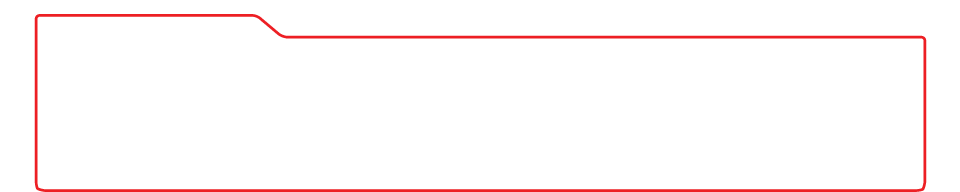
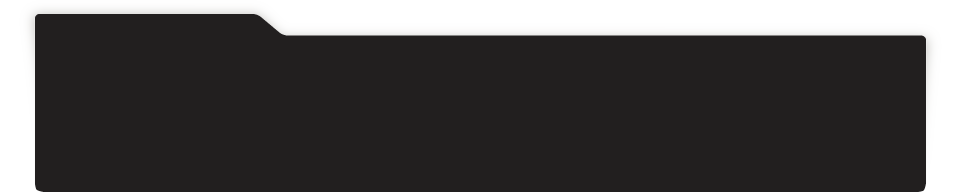
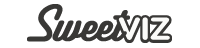
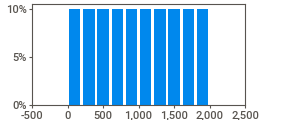
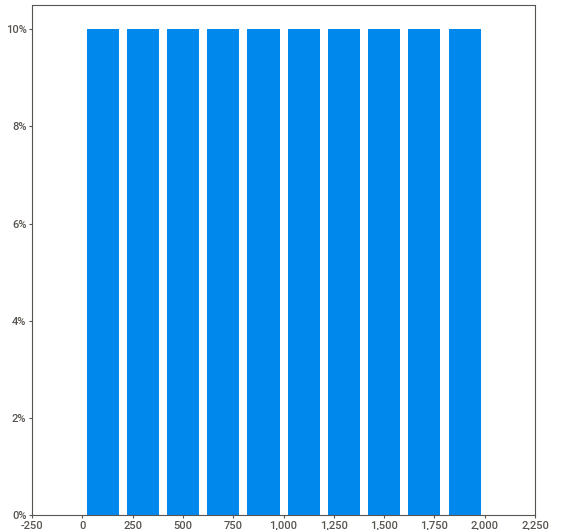
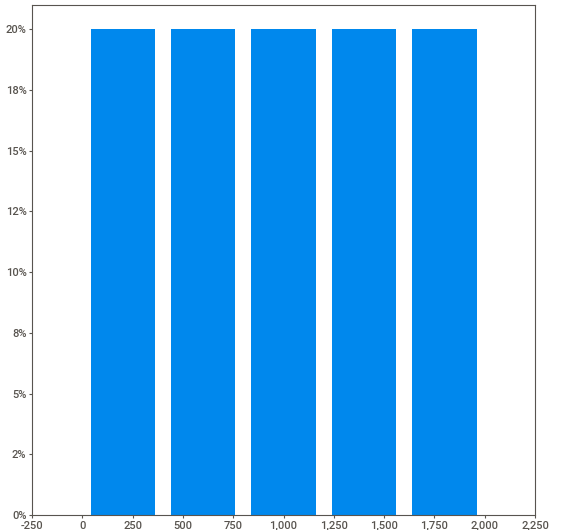
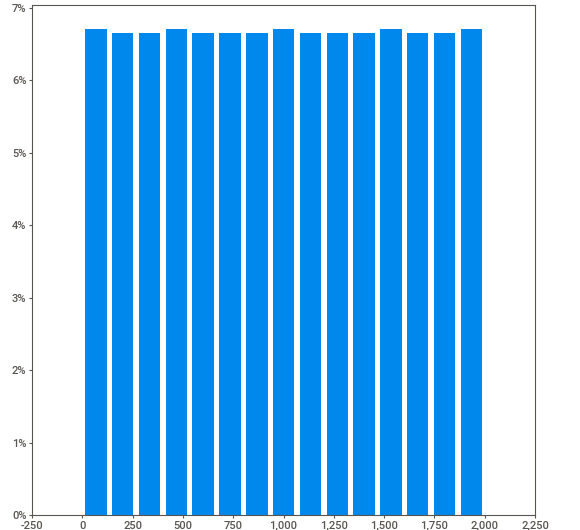
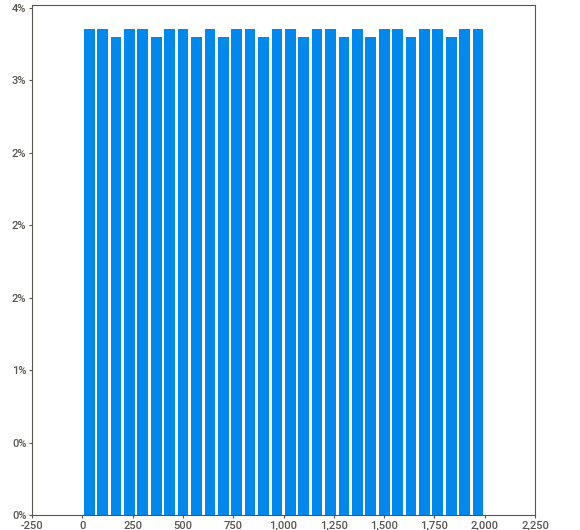
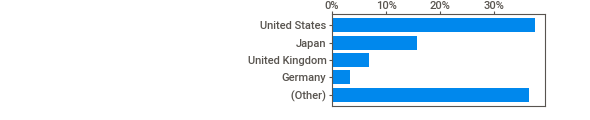
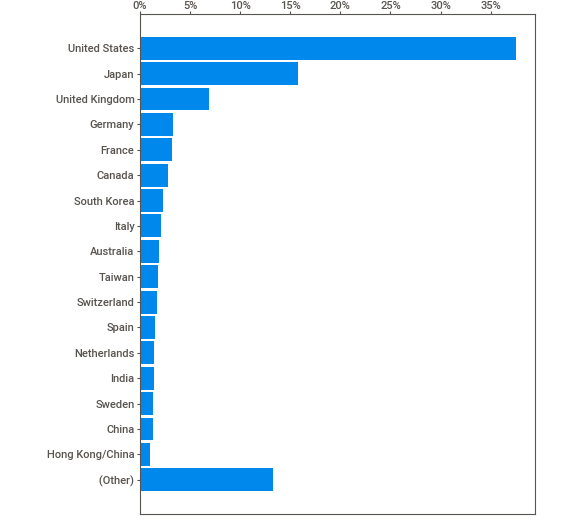
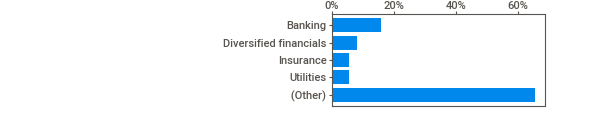
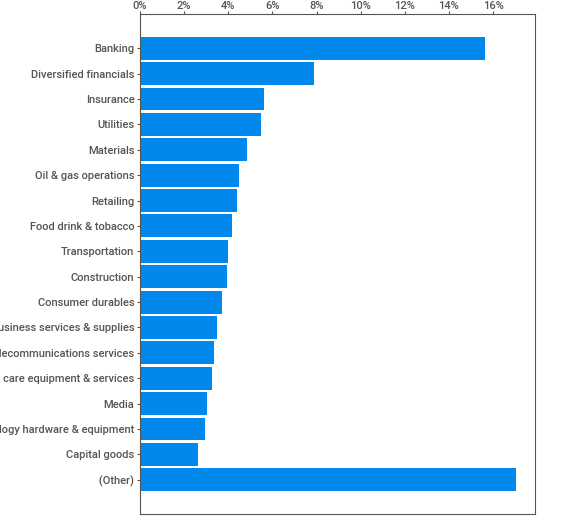
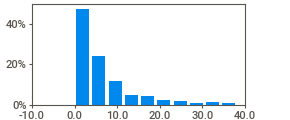
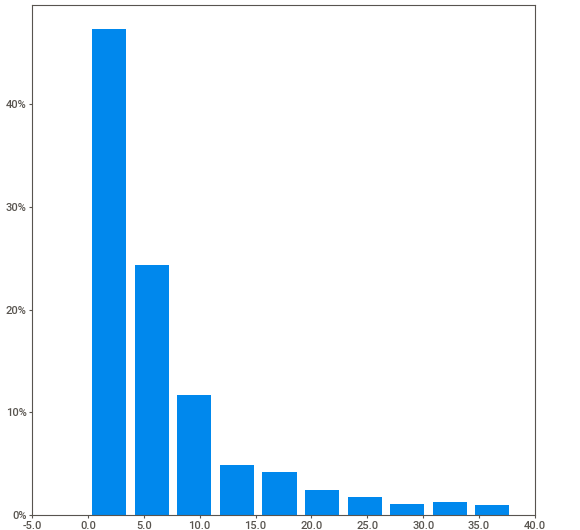
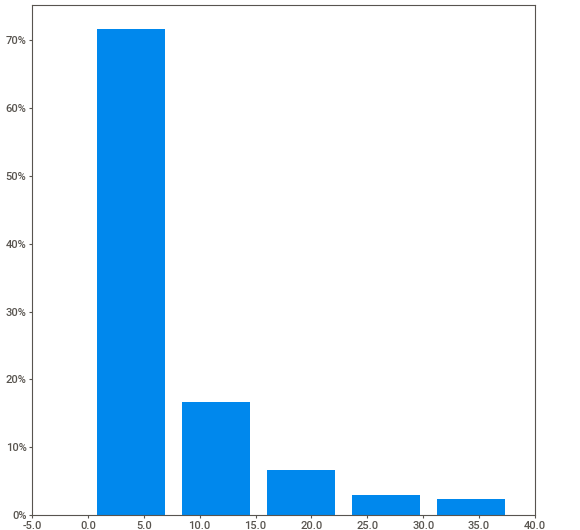
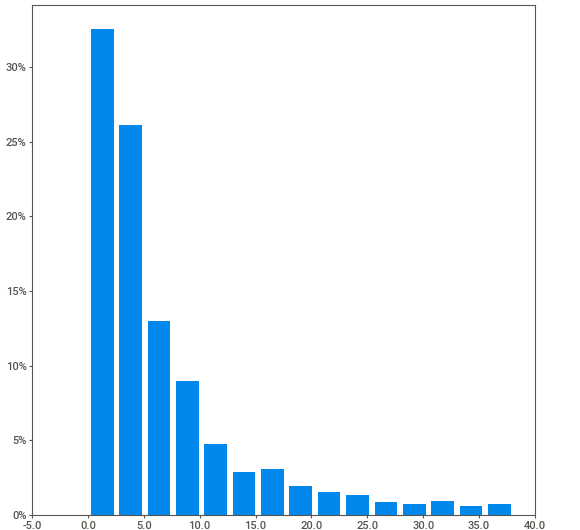
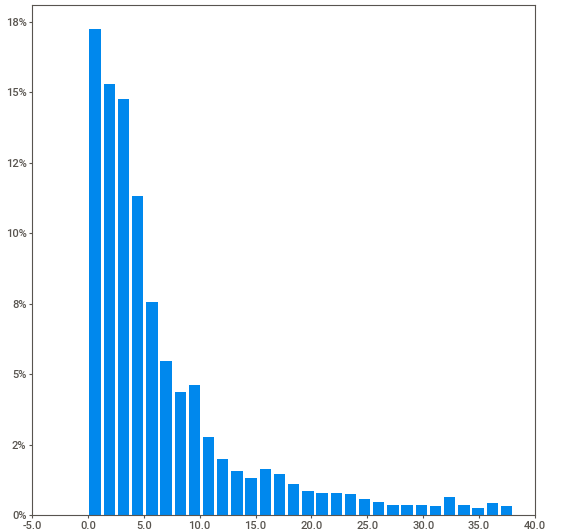
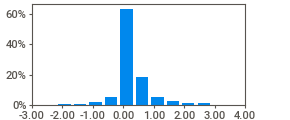
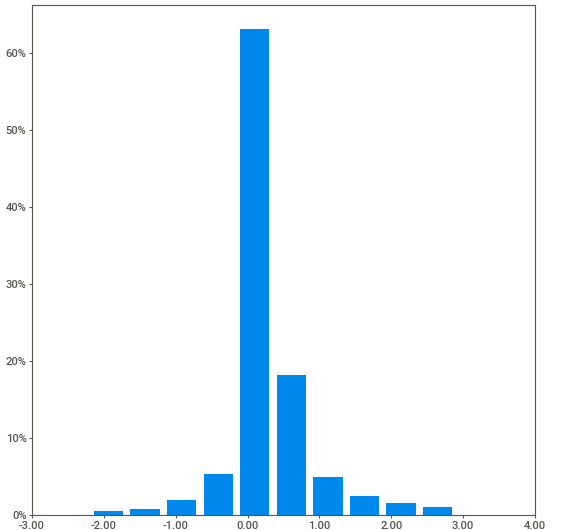
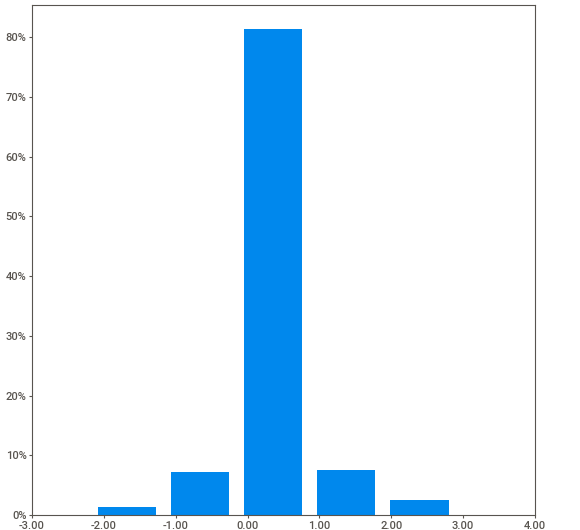
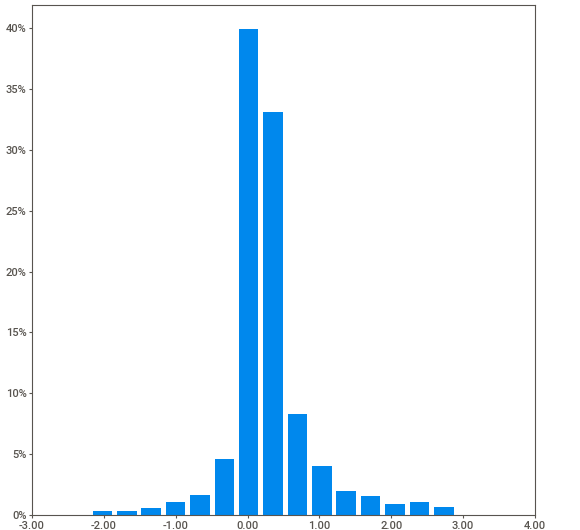
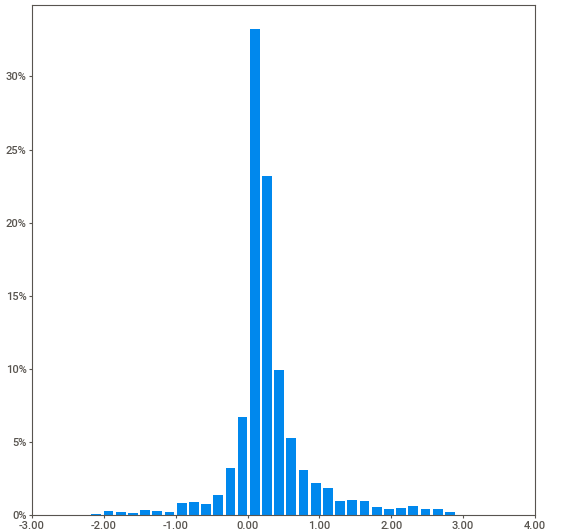
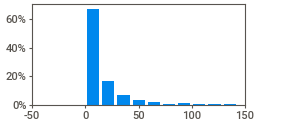
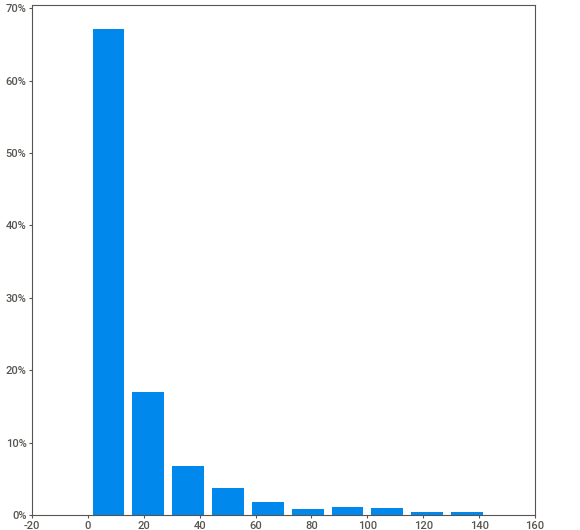
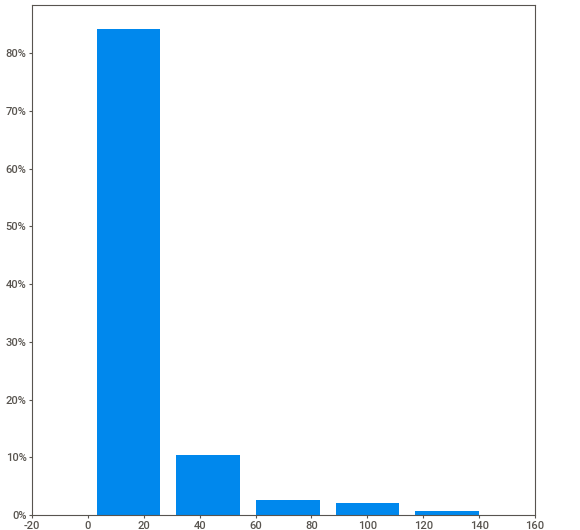
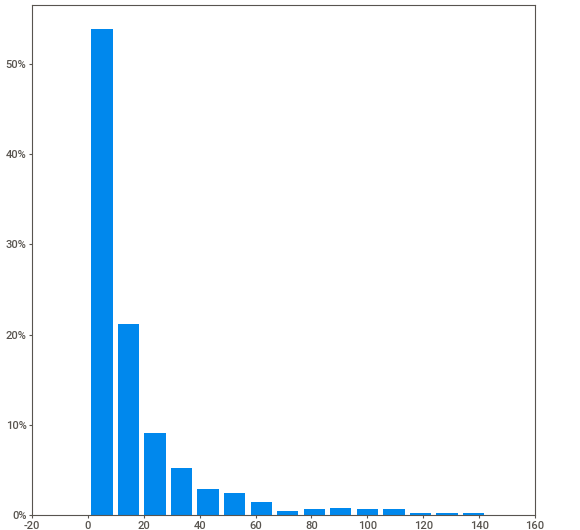
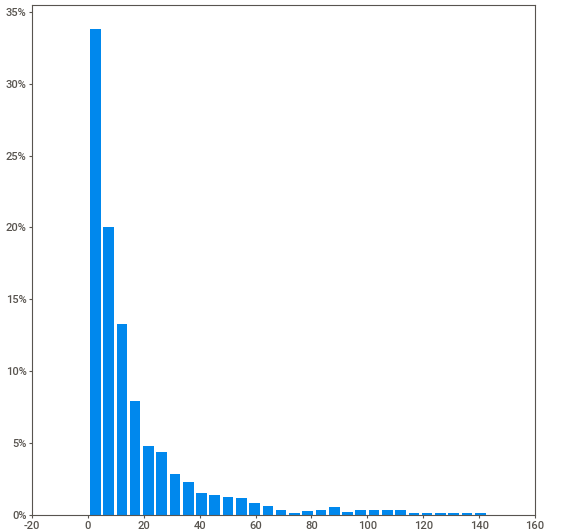
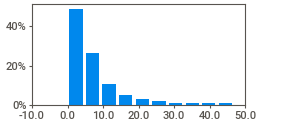
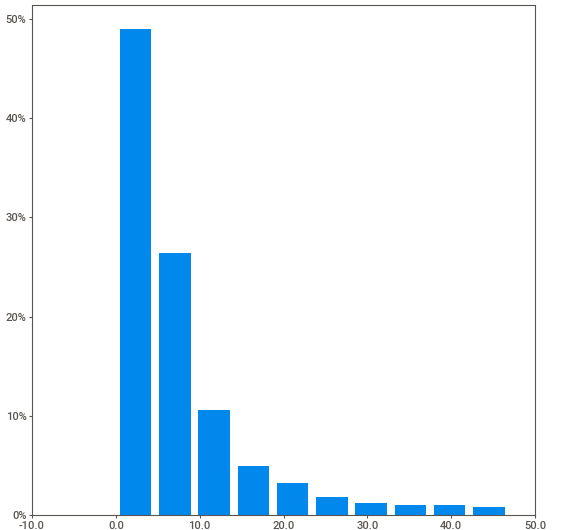
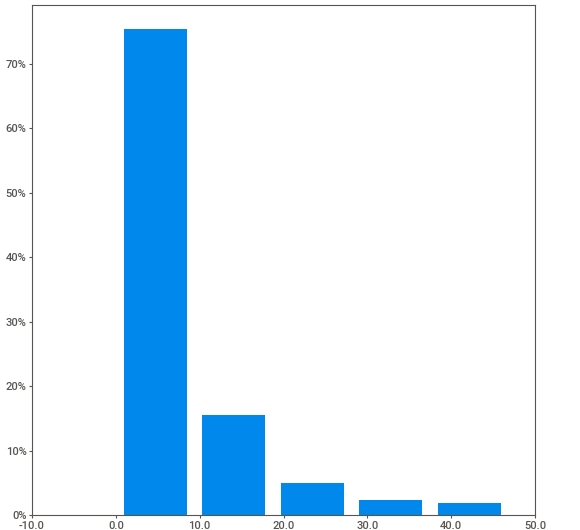
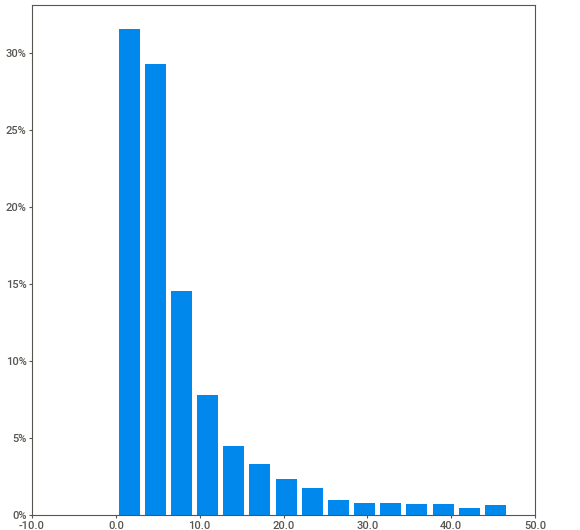
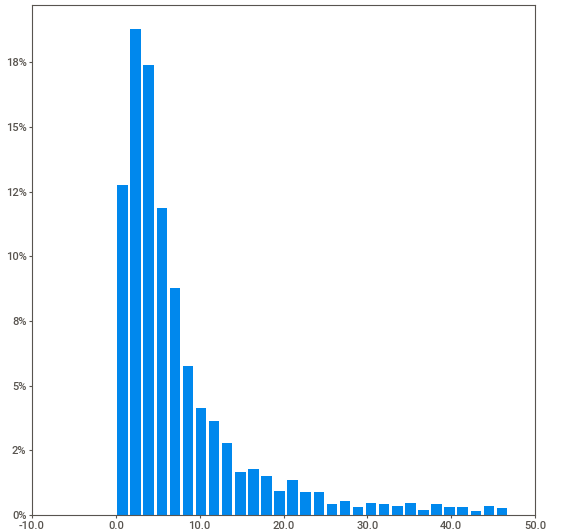
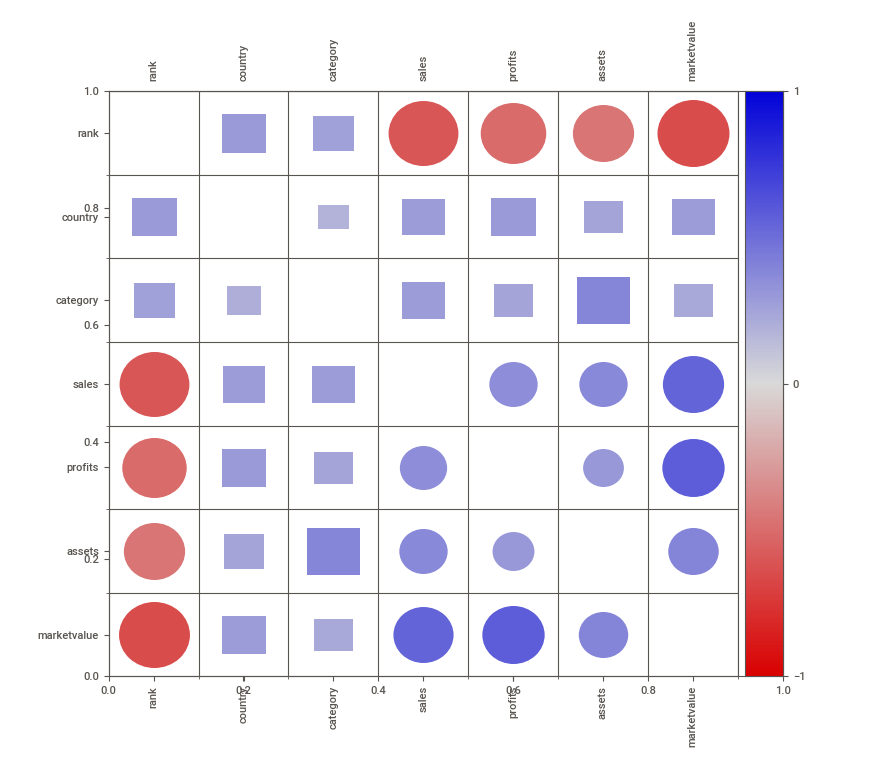
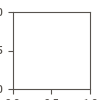

In [ ]:
my_report.show_notebook() #para ver o html no notebook

In [ ]:
my_report.show_html( filepath= './SWEETVIZ_REPORT.html',
                    open_browser=True,
                    layout='widescreen',
                    scale=None) #gera o html e salva no diretório local